<h1> Break-down of my Notebook </h1>
<br>
<li> <b> Section 1: </b> Data Cleaning / Engineering for Visualization </li><br>
<li> <b> Section 2: </b> Exploratory Data Analysis </li><br>
<li> <b> Section 3: </b> Data Cleaning / Engineering for Machine Learning Model </li><br>
<li> <b> Section 4: </b> Model Building (Random Forest / Neural Network (keras) </li><br>
<li> <b> Section 5: </b> Final Report </li> 
<br><br><br>
<b> This Notebook was done on my PC and uploaded to Colab </b>

## Section 1

<b>This section involves: </b>
<br>
<br>
<li> Removing features that I consider feature leakage and features  </li> 
<li> Splitting my data into Train and Test </li>
<li> Handling missing values in my categorical and numerical features </li>

In [0]:
# This imports are necessary for data analysis 

import pandas as pd
import numpy as np

In [0]:
# This imports are necessary for data visualization 

import matplotlib.pyplot as plt
import seaborn as sns 

In [0]:
# This is required for regular expressions (Python)

import re

In [0]:
# Reading my csv file 

data = pd.read_csv('AriseFinalCSV.csv')
data.head()

,clientId,clientIncome,incomeVerified,clientAge,clientGender,clientMaritalStatus,clientLoanPurpose,clientResidentialStauts,clientState,clientTimeAtEmployer,...,interestRate,loanTerm,max_amount_taken,max_tenor_taken,repaidDate,firstPayment,settleDays,firstPaymentRatio,firstPaymentDefault,loanDefault
0,755398623,52500.0,false,29,FEMALE,Single,business,Rented,KANO,7,...,20.0,60,1,1,2018-08-01 11:30:31 UTC,2018-08-13 12:00:00 UTC,-12,0.0,0,0
1,915689736,52500.0,false,25,MALE,Single,business,Rented,LAGOS,21,...,15.0,60,0,1,2018-09-06 05:34:55 UTC,2018-09-21 12:00:00 UTC,-15,0.0,0,0
2,292629156,35000.0,false,32,MALE,Single,education,Rented,ANAMBRA,29,...,15.0,60,0,1,2018-11-27 01:33:56 UTC,2018-09-24 12:00:00 UTC,64,0.0,1,1
3,671710636,35000.0,false,28,FEMALE,Married,business,Own Residence,OSUN,36+,...,15.0,60,1,1,2018-07-09 06:48:44 UTC,2018-07-19 12:00:00 UTC,-10,0.0,0,0
4,367769827,35000.0,false,34,MALE,Married,medical,Rented,ONDO,36+,...,12.5,60,1,1,2018-07-14 02:28:10 UTC,2018-07-02 12:00:00 UTC,12,0.0,1,1


In [0]:
# I had to replace 'Null' string with np.nan so that pandas can recognize them as missing values. 

data = data.replace('Null', np.nan)

In [0]:
# Let me inspect what types of variable are present in my dataset

data.dtypes

clientId                       int64
clientIncome                 float64
incomeVerified                object
clientAge                      int64
clientGender                  object
clientMaritalStatus           object
clientLoanPurpose             object
clientResidentialStauts       object
clientState                   object
clientTimeAtEmployer          object
clientNumberPhoneContacts     object
clientAvgCallsPerDay          object
loanId                        object
loanType                      object
loanNumber                     int64
applicationDate               object
approvalDate                  object
disbursementDate              object
payout_status                 object
dueDate                       object
paidAt                        object
loanAmount                     int64
interestRate                 float64
loanTerm                       int64
max_amount_taken               int64
max_tenor_taken                int64
repaidDate                    object
f

In [0]:

print('Number of loanId labels: ', len(data.loanId.unique()))
print('Number of loanId labels: ',len(data.loanType.unique()))
print('Number of client id:', len(data.clientId.unique()))
print('Number of payout_status labels: ', len(data.payout_status.unique()))
print('Number of loanType labels: ', len(data.loanType.unique()))

print('Number of clients in the dataset: ',len(data))

Number of loanId labels:  159596
Number of loanId labels:  1
Number of client id: 91904
Number of payout_status labels:  1
Number of loanType labels:  1
Number of clients in the dataset:  159596


The features above should be removed as they are Single Valued <b>or</b> they have different values for each client <b> or </b>they are highly to cardinal (i.e. they have high number of unique values ) .<br> <b> These are NOT variables that can help my machine learning model.</b> 

<li> The variable <b> 'dueDate', and 'paidAt' </b> should be removed because I consider them as feature Leakage </li>
<li> The variable <b> 'approvalDate' </b> indicates when the loan was approved. I don't consider this a good feature for predicting whether a loan is defaulted. </li>
<li> The variable <b> 'clientNumberPhoneContacts' </b> is not a variable I consider relevant for my model </li>
<li> The variable <b> 'settleDays','disbursementDate' </b>  are not variables I consider good features </li>


In [0]:
# removing unwanted features for my model 

data = data.drop([
                      'loanId',
                      'clientId',
                      'loanType',
                      'payout_status',
                      'dueDate',
                      'paidAt',
                      'repaidDate',
                      'settleDays',
                      'disbursementDate',
                      'approvalDate',
                      'firstPayment'
                  ], 
                   axis = 1)

In [0]:
data.head()

,clientIncome,incomeVerified,clientAge,clientGender,clientMaritalStatus,clientLoanPurpose,clientResidentialStauts,clientState,clientTimeAtEmployer,clientNumberPhoneContacts,...,loanNumber,applicationDate,loanAmount,interestRate,loanTerm,max_amount_taken,max_tenor_taken,firstPaymentRatio,firstPaymentDefault,loanDefault
0,52500.0,false,29,FEMALE,Single,business,Rented,KANO,7,257,...,6,2018-07-12,16000,20.0,60,1,1,0.0,0,0
1,52500.0,false,25,MALE,Single,business,Rented,LAGOS,21,3964,...,9,2018-08-22,14500,15.0,60,0,1,0.0,0,0
2,35000.0,false,32,MALE,Single,education,Rented,ANAMBRA,29,1140,...,2,2018-08-25,19500,15.0,60,0,1,0.0,1,1
3,35000.0,false,28,FEMALE,Married,business,Own Residence,OSUN,36+,2764,...,4,2018-06-19,19500,15.0,60,1,1,0.0,0,0
4,35000.0,false,34,MALE,Married,medical,Rented,ONDO,36+,504,...,5,2018-06-02,17500,12.5,60,1,1,0.0,1,1


In [0]:
# Converting the applicationDate to dateTime objects 

data.applicationDate = pd.to_datetime(data.applicationDate)

In [0]:
# For my applicationDate, I'm only interested in what month of the year it occured. 

data['applicationMonth'] = data.applicationDate.dt.month
data = data.drop(['applicationDate'], axis = 1)

In [0]:
data.head()

,clientIncome,incomeVerified,clientAge,clientGender,clientMaritalStatus,clientLoanPurpose,clientResidentialStauts,clientState,clientTimeAtEmployer,clientNumberPhoneContacts,...,loanNumber,loanAmount,interestRate,loanTerm,max_amount_taken,max_tenor_taken,firstPaymentRatio,firstPaymentDefault,loanDefault,applicationMonth
0,52500.0,false,29,FEMALE,Single,business,Rented,KANO,7,257,...,6,16000,20.0,60,1,1,0.0,0,0,7
1,52500.0,false,25,MALE,Single,business,Rented,LAGOS,21,3964,...,9,14500,15.0,60,0,1,0.0,0,0,8
2,35000.0,false,32,MALE,Single,education,Rented,ANAMBRA,29,1140,...,2,19500,15.0,60,0,1,0.0,1,1,8
3,35000.0,false,28,FEMALE,Married,business,Own Residence,OSUN,36+,2764,...,4,19500,15.0,60,1,1,0.0,0,0,6
4,35000.0,false,34,MALE,Married,medical,Rented,ONDO,36+,504,...,5,17500,12.5,60,1,1,0.0,1,1,6


In [0]:
# checking for percentage of missing values 

data.isna().mean() * 100

clientIncome                 0.000000
incomeVerified               0.064538
clientAge                    0.000000
clientGender                 0.000000
clientMaritalStatus          0.003759
clientLoanPurpose            0.000000
clientResidentialStauts      0.711797
clientState                  0.000627
clientTimeAtEmployer         2.627885
clientNumberPhoneContacts    1.696784
clientAvgCallsPerDay         1.683626
loanNumber                   0.000000
loanAmount                   0.000000
interestRate                 0.000000
loanTerm                     0.000000
max_amount_taken             0.000000
max_tenor_taken              0.000000
firstPaymentRatio            0.000000
firstPaymentDefault          0.000000
loanDefault                  0.000000
applicationMonth             0.000000
dtype: float64

### Handling Missing Values for Numerical Features 

In [0]:
# It is very important that I do a train test split at this stage.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_spQlit(data.drop(['loanDefault'],axis = 1),
                                                    data.loanDefault, 
                                                    test_size=0.3,
                                                    random_state=0)

In [0]:
print('Original length ', data.shape[0])
print('Train length ', X_train.shape[0])
print('Test length ', X_test.shape[0])

Original length  159596
Train length  111717
Test length  47879


<b> It is important to NOTE that in cases where Median Imputation is adopted, the Median value to be used to fill missing values both in train and test set, should be extracted from the train set only. And this is to avoid overfitting.

In [0]:
# let me create a function that is going to handle my median imputations 

def median_impute(dataFrame, variable, median):
    
    # do the main replacing here 
    dataFrame[variable+'_median_impute'] = dataFrame[variable].fillna(median)
    
    # remove the previous column which had the nan
    dataFrame.drop([variable], axis = 1, inplace = True) 
    
    
    
    print("Median Imputation Completed ")
    
    
    

#### Median imputation on the feature (clientAvgCallsPerDay)

In [0]:
print('X_train median is: ',X_train.clientAvgCallsPerDay.median())

X_train median is:  29.427248628548284


In [0]:
# median inputation on training data 

median_impute(X_train,'clientAvgCallsPerDay',29.427)

Median Imputation Completed 


In [0]:
# median imputation on test data 

median_impute(X_test,'clientAvgCallsPerDay',29.427)

Median Imputation Completed 


In [0]:
# converting the data type of clientAvgCallsPerDay_median_impute to float in both (TRAIN AND TEST)

X_train.clientAvgCallsPerDay_median_impute = X_train.clientAvgCallsPerDay_median_impute.astype('float')
X_test.clientAvgCallsPerDay_median_impute = X_test.clientAvgCallsPerDay_median_impute.astype('float')

In [0]:
# converting the data type of clientNumberPhoneContacts to float in both (TRAIN AND TEST)

X_train.clientNumberPhoneContacts = X_train.clientNumberPhoneContacts.astype('float')
X_test.clientNumberPhoneContacts= X_test.clientNumberPhoneContacts.astype('float')

#### Median imputation on the feature (clientNumberPhoneContacts)

In [0]:
print('X_train median is: ',X_train.clientNumberPhoneContacts.median())

X_train median is:  825.0


In [0]:
# median inputation on training data 

median_impute(X_train,'clientNumberPhoneContacts',825.0)

Median Imputation Completed 


In [0]:
# median imputation on test data 

median_impute(X_test,'clientNumberPhoneContacts',825.0)

Median Imputation Completed 


#### For clientTimeAtEmployer I would prefer to encode my missing values with '0'. 

In [0]:
X_train.clientTimeAtEmployer.unique()

array(['36+', '20', '1', '12', '10', '29', nan, '27', '5', '22', '33',
       '14', '6', '2', '24', '28', '23', '3', '31', '11', '9', '16', '34',
       '19', '0', '4', '15', '35', '25', '17', '32', '13', '30', '21',
       '26', '8', '18', '7', '-5'], dtype=object)

I have some string values e.g. <b> '36+' </b> I would have to handle them so that I can convert them to a float type 

In [0]:
# using regular expression from python ... 

# the code below is going to extract the numeric values  from my string value ... e.g '36+' returns 36 (numeric)

X_train.clientTimeAtEmployer = X_train.clientTimeAtEmployer.str.extract('(\d+)')[0]
X_test.clientTimeAtEmployer = X_test.clientTimeAtEmployer.str.extract('(\d+)')[0]

X_train.clientTimeAtEmployer = X_train.clientTimeAtEmployer.astype('float')
X_test.clientTimeAtEmployer = X_test.clientTimeAtEmployer.astype('float')

In [0]:
# replacing missing values in clientTimeAtEmployer with 0

X_test.clientTimeAtEmployer.fillna(0, inplace = True)
X_train.clientTimeAtEmployer.fillna(0, inplace = True)

### Handling Missing Values for Categorical Features 

The approach I adopt is to give value to missing values. I feel that if a customer decides not to fill a particular entry, its for a reason so I decide to encode them with the value <b>"UNKNOWN"</b>

Aside handling missing values for categorical Features, I also adopt an approch of grouping related categorical features together in order to reduce feature space. An example is illustrated in encoding my <b> client-State </b> 

#### (*)  Encoding the ClientStates according to their Geo-Political Zones 

Encoding each of our 36 states does not feel efficient to me. One major disadvantage of this approach is that it would increase my feature space. 
My solution is to encode the various states in Nigeria into their respective Geopolitical Zones. 

We have 6 Geopolitical Zones in Nigeria.
<li> <b> North West </b> </li> 
<li> <b> North East </b> </li>
<li> <b> North Central </b> </li>
<li> <b> South West </b> </li> 
<li> <b> South South </b> </li>
<li> <b> South East </b> </li>

During exploration of this variable I observed a state <b> OJO </b>. This is not a valid state in Nigeria. 

In [0]:
data.clientState.unique()

array(['KANO', 'LAGOS', 'ANAMBRA', 'OSUN', 'ONDO', 'OYO', 'RIVERS',
       'AKWA IBOM', 'KWARA', 'ENUGU', 'ABUJA', 'OGUN', 'EDO', 'NIGER',
       'BAYELSA', 'EKITI', 'DELTA', 'BENUE', 'CROSS RIVER', 'KADUNA',
       'ABIA', 'PLATEAU', 'EBONYI', 'KOGI', 'IMO', 'ADAMAWA', 'JIGAWA',
       'NASARAWA', 'KEBBI', 'KATSINA', 'BAUCHI', 'SOKOTO', 'TARABA',
       'ZAMFARA', 'GOMBE', 'BORNO', 'YOBE', 'OJO', nan, 'LAGOS '],
      dtype=object)

In [0]:
# Encoding the states in my Training Data

X_train.clientState = X_train.clientState.map({  'BENUE' :'NORTH_CENTRAL',
                                            'ABUJA' :'NORTH_CENTRAL',
                                            'KOGI' :'NORTH_CENTRAL',
                                            'KWARA' :'NORTH_CENTRAL',
                                            'NASARAWA' :'NORTH_CENTRAL',
                                            'NIGER' :'NORTH_CENTRAL',
                                            'PLATEAU' :'NORTH_CENTRAL',

                                            'ADAMAWA' :'NORTH_EAST',
                                            'BAUCHI' :'NORTH_EAST',
                                            'BORNO' :'NORTH_EAST',
                                            'GOMBE' :'NORTH_EAST',
                                            'TARABA' :'NORTH_EAST',
                                            'YOBE' :'NORTH_EAST',

                                            'KADUNA' :'NORTH_WEST',
                                            'KATSINA' :'NORTH_WEST',
                                            'KANO' :'NORTH_WEST',
                                            'KEBBI' :'NORTH_WEST',
                                            'SOKOTO' :'NORTH_WEST',
                                            'JIGAWA' :'NORTH_WEST',
                                            'ZAMFARA' :'NORTH_WEST',

                                             'ABIA' :'SOUTH_EAST',
                                             'ANAMBRA' :'SOUTH_EAST',
                                             'EBONYI' :'SOUTH_EAST',
                                             'ENUGU' :'SOUTH_EAST',
                                             'IMO':'SOUTH_EAST',

                                            'AKWA IBOM' :'SOUTH',
                                            'BAYELSA' :'SOUTH',
                                            'CROSS RIVER' :'SOUTH',
                                            'DELTA' :'SOUTH',
                                            'EDO' :'SOUTH',
                                            'RIVERS' :'SOUTH',
                                            'OJO': 'UNKNOWN',
                                            
                                               

                                            'EKITI' :'SOUTH_WEST',
                                            'LAGOS' :'SOUTH_WEST',
                                            'OSUN' :'SOUTH_WEST',
                                            'ONDO' :'SOUTH_WEST',
                                            'OGUN' :'SOUTH_WEST',
                                            'OYO' :'SOUTH_WEST'})

In [0]:
# Encoding the state in my Test Data

X_test.clientState = X_test.clientState.map({  'BENUE' :'NORTH_CENTRAL',
                                            'ABUJA' :'NORTH_CENTRAL',
                                            'KOGI' :'NORTH_CENTRAL',
                                            'KWARA' :'NORTH_CENTRAL',
                                            'NASARAWA' :'NORTH_CENTRAL',
                                            'NIGER' :'NORTH_CENTRAL',
                                            'PLATEAU' :'NORTH_CENTRAL',

                                            'ADAMAWA' :'NORTH_EAST',
                                            'BAUCHI' :'NORTH_EAST',
                                            'BORNO' :'NORTH_EAST',
                                            'GOMBE' :'NORTH_EAST',
                                            'TARABA' :'NORTH_EAST',
                                            'YOBE' :'NORTH_EAST',

                                            'KADUNA' :'NORTH_WEST',
                                            'KATSINA' :'NORTH_WEST',
                                            'KANO' :'NORTH_WEST',
                                            'KEBBI' :'NORTH_WEST',
                                            'SOKOTO' :'NORTH_WEST',
                                            'JIGAWA' :'NORTH_WEST',
                                            'ZAMFARA' :'NORTH_WEST',

                                             'ABIA' :'SOUTH_EAST',
                                             'ANAMBRA' :'SOUTH_EAST',
                                             'EBONYI' :'SOUTH_EAST',
                                             'ENUGU' :'SOUTH_EAST',
                                             'IMO':'SOUTH_EAST',

                                            'AKWA IBOM' :'SOUTH',
                                            'BAYELSA' :'SOUTH',
                                            'CROSS RIVER' :'SOUTH',
                                            'DELTA'  :'SOUTH',
                                            'EDO'    :'SOUTH',
                                            'RIVERS' :'SOUTH',

                                            'EKITI' :'SOUTH_WEST',
                                            'LAGOS' :'SOUTH_WEST',
                                            'OSUN'  :'SOUTH_WEST',
                                            'ONDO'  :'SOUTH_WEST',
                                            'OGUN'  :'SOUTH_WEST',
                                            'OYO'   :'SOUTH_WEST'})

In [0]:
# replacing missing values in both train and test with the value 'UNKNOWN'

X_test.fillna(value='UNKNOWN', inplace=True)
X_train.fillna(value='UNKNOWN', inplace=True)

## Section 2

<b>This section involves: </b>
<br>
<br>
<li> Graphically representing the relationship between different features in my DataSet </li>
<li>To achieve this, I would have to concatenate my <b> X_train and y_train </b> together ... </li> <br>This should be done because I had initially done a train test split and I want a clear Graphical Representation of the relationship between my features

In [0]:
X_train.columns

Index(['clientIncome', 'incomeVerified', 'clientAge', 'clientGender',
       'clientMaritalStatus', 'clientLoanPurpose', 'clientResidentialStauts',
       'clientState', 'clientTimeAtEmployer', 'loanNumber', 'loanAmount',
       'interestRate', 'loanTerm', 'max_amount_taken', 'max_tenor_taken',
       'firstPaymentRatio', 'firstPaymentDefault', 'applicationMonth',
       'clientAvgCallsPerDay_median_impute',
       'clientNumberPhoneContacts_median_impute'],
      dtype='object')

In [0]:
new_XTRAIN_YTRAIN = pd.concat([X_train,y_train], axis = 1)

In [0]:
new_XTRAIN_YTRAIN.dtypes

clientIncome                               float64
incomeVerified                              object
clientAge                                    int64
clientGender                                object
clientMaritalStatus                         object
clientLoanPurpose                           object
clientResidentialStauts                     object
clientState                                 object
clientTimeAtEmployer                       float64
loanNumber                                   int64
loanAmount                                   int64
interestRate                               float64
loanTerm                                     int64
max_amount_taken                             int64
max_tenor_taken                              int64
firstPaymentRatio                          float64
firstPaymentDefault                          int64
applicationMonth                             int64
clientAvgCallsPerDay_median_impute         float64
clientNumberPhoneContacts_media

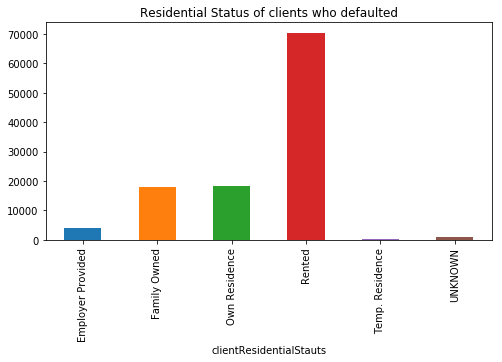

In [0]:
plt.rcParams['figure.figsize'] = 8,4
plt.title('Residential Status of clients who defaulted')
new_XTRAIN_YTRAIN.groupby('clientResidentialStauts').loanDefault.count().plot(kind = 'bar')

<b>From the plot above, its obvious that those who lived in Rented Apartment were majority of those who defaulted.

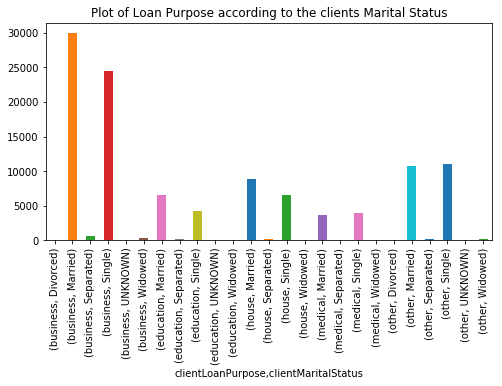

In [0]:
plt.title('Plot of Loan Purpose according to the clients Marital Status')
new_XTRAIN_YTRAIN.groupby(['clientLoanPurpose','clientMaritalStatus']).loanDefault.count().plot(kind = 'bar')

<b> From the plot above its obvious that those who defaulted the most were those who are married and their loan purpose was Business </b>

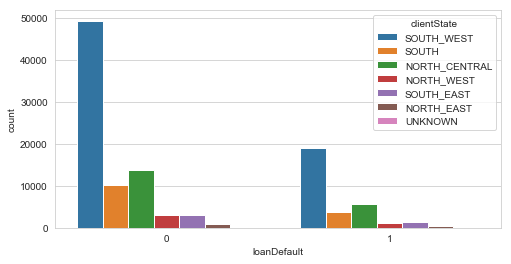

In [0]:
sns.set_style('whitegrid')
sns.countplot(x='loanDefault',hue='clientState',data=new_XTRAIN_YTRAIN)

<b> From the plot above its obvious that majority of those who defaulted and didnt default were from South West. States in this category include lagos, osun, ekiti, e.t.c </b> 

In [0]:
new_XTRAIN_YTRAIN.incomeVerified.unique()

array(['false', 'true', 'UNKNOWN'], dtype=object)

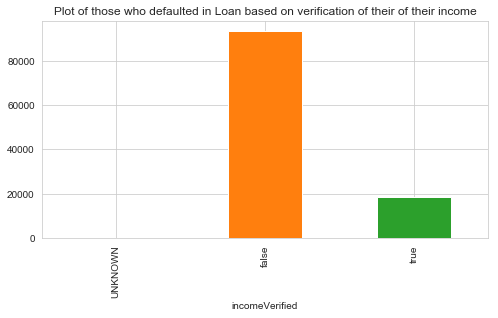

In [0]:
plt.title('Plot of those who defaulted in Loan based on verification of their of their income')
new_XTRAIN_YTRAIN.groupby('incomeVerified')['loanDefault'].count().plot(kind = 'bar')

<b> From the plot above its obvious that majority of those who defaulted were those whose income was not verified </b>

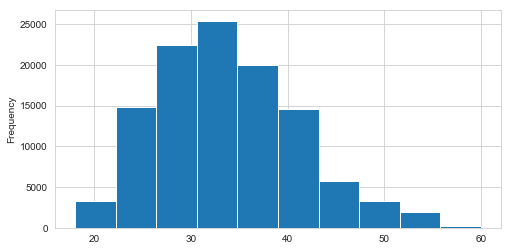

In [0]:
new_XTRAIN_YTRAIN.clientAge.plot(kind = 'hist')

<b> From the plot above, our age seems to be normally distributed. This is a good this </b>

## Section 3

<b> This section involves: </b> 

<li> Encoding all values of my variables to numerical for my Machine Learning Algorithm </li> 
<li> Removing correlated Features </li> 
<li> Performing Feature Selection </li>
<li> And many more ... 

In [0]:
X_train.dtypes

clientIncome                               float64
incomeVerified                              object
clientAge                                    int64
clientGender                                object
clientMaritalStatus                         object
clientLoanPurpose                           object
clientResidentialStauts                     object
clientState                                 object
clientTimeAtEmployer                       float64
loanNumber                                   int64
loanAmount                                   int64
interestRate                               float64
loanTerm                                     int64
max_amount_taken                             int64
max_tenor_taken                              int64
firstPaymentRatio                          float64
firstPaymentDefault                          int64
applicationMonth                             int64
clientAvgCallsPerDay_median_impute         float64
clientNumberPhoneContacts_media

In [0]:
# I would be replacing the values of this feature with TRUE = 1, FALSE = 0, UNKNOWN = -1
X_train.incomeVerified.unique()

array(['false', 'true', 'UNKNOWN'], dtype=object)

In [0]:
X_train.incomeVerified = X_train.incomeVerified.map({'false':0,
                            'true': 1,
                            'UNKNOWN':-1},
                          )
X_test.incomeVerified = X_test.incomeVerified.map({'false':0,
                            'true': 1,
                            'UNKNOWN':-1},
                          )

In [0]:
# For simplicity, I want to adopt one hot encoding for my remaining categorical features.
# I would not be adopting the approach of using k-1 variables to capture k features because
# according to my research, tree based algorithms should have access to all variables encoded. 
# I would still check for correlation so I have zero worries for multicollinearity  :)

X_train = pd.get_dummies(data = X_train, columns=['clientGender','clientMaritalStatus','clientLoanPurpose','clientResidentialStauts','clientState'])
X_test = pd.get_dummies(data = X_test, columns=['clientGender','clientMaritalStatus','clientLoanPurpose','clientResidentialStauts','clientState'])


####  (Checking for Correlation Section)

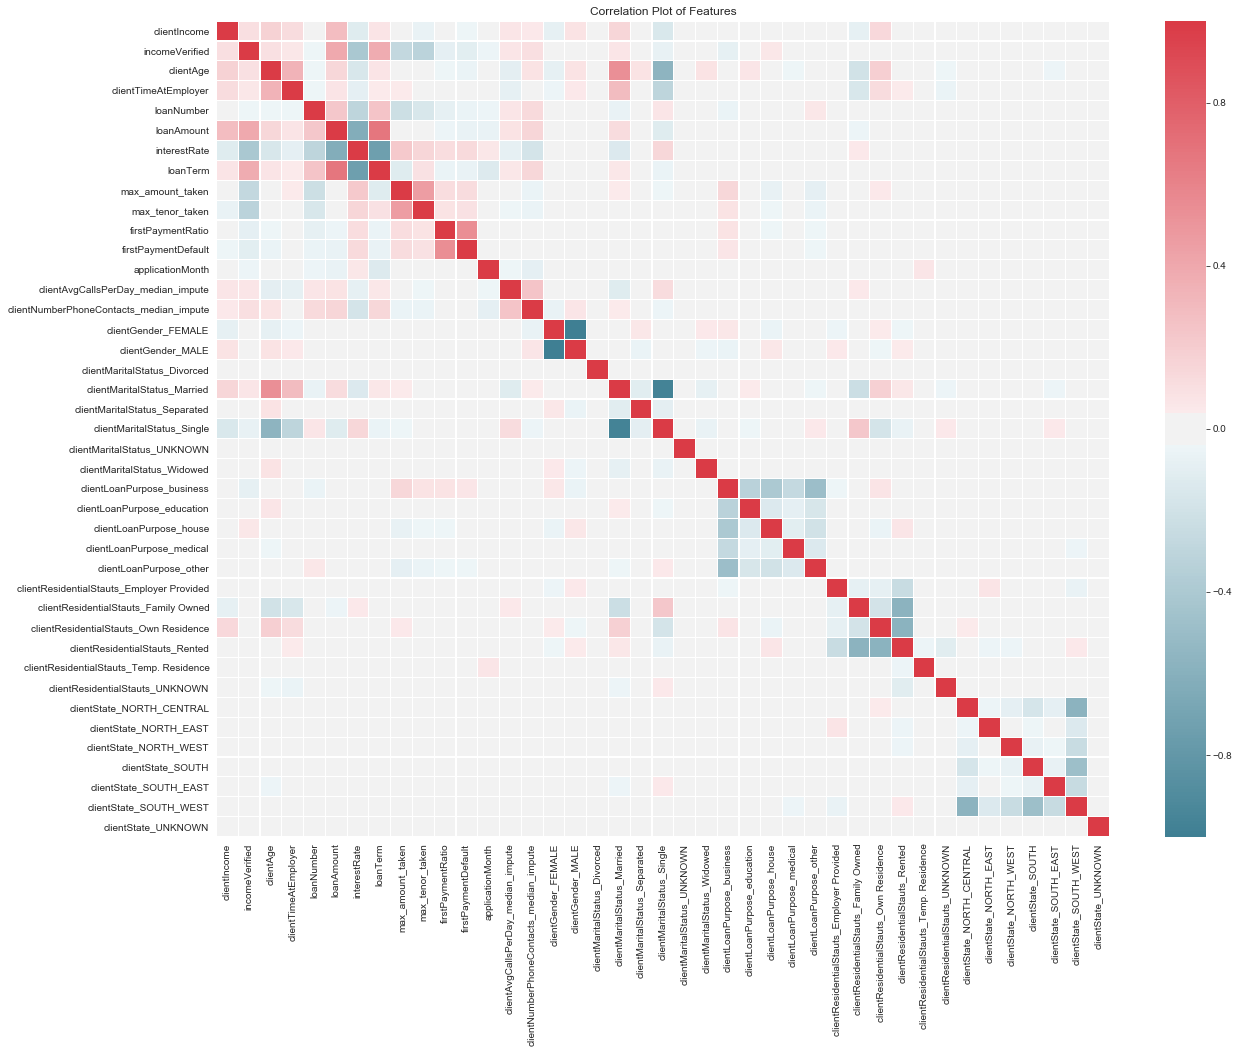

In [0]:
plt.rcParams['figure.figsize'] = 20,15
plt.title('Correlation Plot of Features')
sns.heatmap(X_train.corr(),linewidths=0.15,cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [0]:
# Let me create a function that is going to remove features that are correlated. 
# the function would allow me to specify a threshold. Which is a degree to which features are considered correlated. 


def correlated_features(myDataFrame, myThreshold):
    
    col_corr = set() # This is a set which holds my correlated features 
    
    corr_matrix = myDataFrame.corr() # correlation matrix is stored in corr_matrix
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > myThreshold:
                
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                
    return col_corr # return correlated features 

corr_features = correlated_features(X_train, 0.7)

print('I have',len(set(corr_features)), 'features which are correlated.')
print('The Correlated features are:',corr_features)

I have 3 features which are correlated.
The Correlated features are: {'clientGender_MALE', 'clientMaritalStatus_Single', 'loanTerm'}


In [0]:
print('Before removing Correlated Features')
print('\nXTrain had', (X_train.shape[1]), 'features')
print('XTest had', X_test.shape[1], 'features')

Before removing Correlated Features

XTrain had 41 features
XTest had 41 features


In [0]:
# let me remove correlated features from both my train and test data. 

X_train.drop(labels=corr_features, axis = 1, inplace=True)
X_test.drop(labels=corr_features, axis = 1, inplace=True)

print('After removing Correlated Features')
print('\nXTrain now has', (X_train.shape[1]), 'features')
print('XTest now has', (X_test.shape[1]), 'features')

After removing Correlated Features

XTrain now has 38 features
XTest now has 38 features


#### Removing Features using univariate ROC-AUC

This is a technique I use to check for features which really influence my target variable. Although the features are considered seperately. 
When the value of my ROC-AUC is 0,5 or less, it means that the feature is not really reliable ... I can choose to remove it.

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [0]:
# I desire to find important features using univariate roc-auc

# To achieve this, I loop to build a tree, make predictions and get the roc-auc
# for each feature of the train set

roc_values = []
for feature in X_train.columns:
    clf = DecisionTreeClassifier()
    clf.fit(X_train[feature].to_frame(), y_train)
    y_scored = clf.predict_proba(X_test[feature].to_frame())
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))

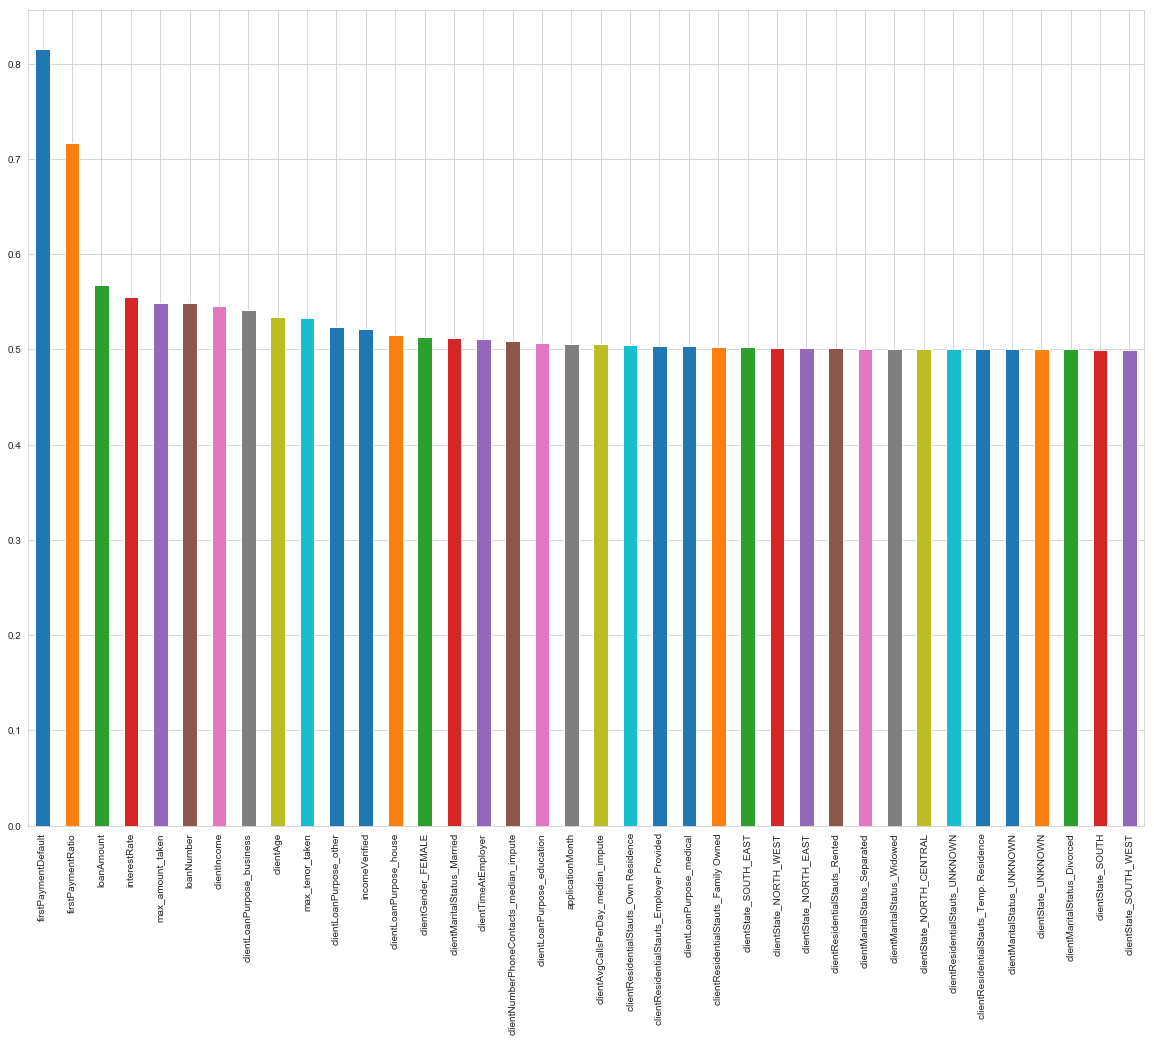

In [0]:
roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values.sort_values(ascending = False).plot.bar(figsize = (20,15))

In [0]:
print("The features with ROC - AUC values less than or equall to 0.5 are listed below:\n\n",roc_values[roc_values <= 0.5])

The features with ROC - AUC values less than or equall to 0.5 are listed below:

 clientMaritalStatus_Divorced    0.499963
clientState_SOUTH               0.499728
clientState_SOUTH_WEST          0.499270
clientState_UNKNOWN             0.499985
dtype: float64


I would choose to remove these features as they do not help my model (Univariately). The good news is that have been able to reduce my "feature Space" :)

In [0]:
roc_values[roc_values <= 0.5].index

Index(['clientMaritalStatus_Divorced', 'clientState_SOUTH',
       'clientState_SOUTH_WEST', 'clientState_UNKNOWN'],
      dtype='object')

In [0]:
# removing the features with low ROC - AUC values from both my train and test 

X_train.drop(roc_values[roc_values <= 0.5].index, axis=1, inplace=True)
X_test.drop(roc_values[roc_values <= 0.5].index, axis=1, inplace=True)

In [0]:
print('Number of features in Train is: ', X_train.shape[-1])
print('Number of features in Test is: ', X_test.shape[-1])

Number of features in Train is:  34
Number of features in Test is:  34


My Feature Space has decreased from 38 to 34. <br>I would end this section here. Although there are other feature engineering that can still be done for example I could combine features to make other features which might have a high ROC-AUC value 

## Section 4

   ### (1)  -> Random Forest 

#### Preparing objects for modelling 

In [0]:
# I desire to scale my data using the Robust Scaler ... I prefer this cos the output does not change much due to the presence  
# outliers

from sklearn.preprocessing import RobustScaler

In [0]:
# Creating a scaler object 

scaler_object = RobustScaler()

In [0]:
# Since I have already performed a train test split, I would fit my object to my training data i.e. obtain my (min) and (max)
# values from my training data and then use it to transform my test data ... 
# Its better this way as I do not want any form of DATA LEAK :)

scaler_object.fit(X_train)

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)

In [0]:
# transforming my X_train and X_test 

scaled_X_train = scaler_object.transform(X_train)
scaled_X_test = scaler_object.transform(X_test)

#### Hyper - Parameter Tuning for RandomForest

<li> <b> n_estimator: </b> The number of trees in the forest </li>
<li> <b> max_features: </b> The number of features to consider when looking for the best split. Possible choices: n_features, sqrt(n_features), log2(n_features) </li> 
<li> <b> max_depth: </b> The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples </li>

In [0]:
# importing my Random Forest algorithm
# setting the n_jobs = -1 simply means "Computer, make sure you use all the cores u've got"

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=55, n_jobs=-1)

In [0]:
parameter_grid = {'n_estimators': [25,50,75,100],
                  'max_depth': [10,15,20,30],
                  'max_features': ['auto', 'sqrt']}

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
RF_classifier = GridSearchCV(estimator=RF, param_grid=parameter_grid, refit = True, 
                            scoring='roc_auc', cv = 5, n_jobs=-1,verbose = 10)

RF_classifier.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 10.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=55, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [25, 50, 75, 100], 'max_depth': [10, 15, 20, 30], 'max_features': ['auto', 'sqrt']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=10)

#### Good news !!! My search for best hyperparameter for my Random Forest is over :) 

In [0]:
RF_classifier.best_params_

{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 100}

In [0]:
RF_classifier.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=55, verbose=0, warm_start=False)

In [0]:
# predicting values off the test data

predictions = RF_classifier.predict(scaled_X_test)

In [0]:
# predicting values off the training set 

train_prediction = RF_classifier.predict(scaled_X_train)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

### Classification Report for Random Forest on Training Data

In [0]:
print('\n')
print(classification_report(y_train,train_prediction))



              precision    recall  f1-score   support

           0       0.85      0.98      0.91     80524
           1       0.91      0.56      0.69     31193

   micro avg       0.86      0.86      0.86    111717
   macro avg       0.88      0.77      0.80    111717
weighted avg       0.87      0.86      0.85    111717



### Classification Report for Random Forest on Test Data

In [0]:
print('\n')
print(classification_report(y_test,predictions))



              precision    recall  f1-score   support

           0       0.84      0.97      0.90     34402
           1       0.88      0.52      0.66     13477

   micro avg       0.85      0.85      0.85     47879
   macro avg       0.86      0.75      0.78     47879
weighted avg       0.85      0.85      0.83     47879



   ### (2)  -> Neural Networks

In [0]:
# keras is the deep learning framework I am going to be using to build my Neural Network 

import keras 

Using TensorFlow backend.


In [0]:
# ANN = Artificial Neural Network
# the Sequential module is necessary to initialize my ANN. i.e. create my model
# the Dense module is required to build the layers of my ANN

from keras.models import Sequential
from keras.layers import Dense


#### Hyper - Parameter Tuning for Deep Neural Network

<li> <b> Epoch: </b>  An epoch is a complete cycle through our training data. </li>
<li> <b> Batch size: </b> My model cannot consider all my data at once. I should divide them into small groups. The groups represent the Batch Size </li>
<li> <b> Optimizer: </b> Determines how the network will be updated based on the loss function </li>

<font color = 'green'><b> I would be using ScikitLearn to achieve my hyper parameter tuning. 
Keras models can be used in scikit-learn by wrapping them with the KerasClassifier or KerasRegressor class.</b> </font>

<b>To use these wrappers you must define a function that creates and returns your Keras sequential model</b>, <font color = 'red'>then pass this function to the build_fn argument when constructing the KerasClassifier class.

In [0]:
# i need a keras wrapper and the keras wrapper is keras classifier

from keras.wrappers.scikit_learn import KerasClassifier

In [0]:
# i need the GridSearchCV from scikit learn 

from sklearn.model_selection import GridSearchCV

In [0]:
# let the meat begin .... ( remember i need a function )

# The function creates and returns my Keras sequential model 

# it is important to note that if I desire to tune any hyper parameter that is within the architecture of my ann,
# I would have to pass it as a parameter to the function have created build_classifier for e.g and 
# do necessary replacements.

def build_classifier(optimizer): # in this case i would like to tune the optimizer parameter 
    
    # what goes inside is the code that builds my artificial neural network. 
    clasifier = Sequential() # this classifier is a LOCAL VARIABLE 
    clasifier.add(Dense(8, activation = 'relu'))
    clasifier.add(Dense(6, activation = 'relu'))
    clasifier.add(Dense(4, activation = 'relu'))
    clasifier.add(Dense(1, activation = 'sigmoid'))
    clasifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    return clasifier

# am suppose to pass the function have created to the build_fn argument when constructing the KerasClassifier class 

classifier = KerasClassifier(build_fn=build_classifier)  # this guy here is global and it is my wrapper


# I need to start by creating a dictionary that contains the hyperparameters i desire to tune 

parameter = {'batch_size':[10,25,32],
             'epochs': [100],
             'optimizer': ['adam','rmsprop']}

# It is time for me to implement my GridSearch 
# <<< we specify our metric and number of cv validation >>>

# estimator is our model that implements the fit method
grid_search = GridSearchCV(estimator=classifier, 
                           param_grid=parameter, 
                           scoring='accuracy',
                           cv = 5) 

# beautiful ... :) the next thing is to fit the gridSearch to my training object ... 

grid_search = grid_search.fit(scaled_X_train,y_train.values,verbose = 5)

# I desire to get the best parameters and best accuracy 

# best_parameter = grid_search.best_parameter
# best_accuracy = grid_search.best_accuracy

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78/100
Epoch 79/100
Epoch 80/100
Epoch 81/100
Epoch 82/100
Epoch 83/100
Epoch 84/100
Epoch 85/100
Epoch 86/100
Epoch 87/100
Epoch 88/100
Epoch 89/100
Epoch 90/100
Epoch 91/100
Epoch 92/100
Epoch 93/100
Epoch 94/100
Epoch 95/100
Epoch 96/100
Epoch 97/100
Epoch 98/100
Epoch 99/100
Epoch 100/100
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 1

Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78/100
Epoch 79/100
Epoch 80/100
Epoch 81/100
Epoch 82/100
Epoch 83/100
Epoch 84/100
Epoch 85/100
Epoch 86/100
Epoch 87/100
Epoch 88/100
Epoch 89/100
Epoch 90/100
Epoch 91/100
Epoch 92/100
Epoch 93/100
Epoch 94/100
Epoch 95/100
Epoch 96/100
Epoch 97/100
Epoch 98/100
Epoch 99/100
Epoch 100/100
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 4

Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78/100
Epoch 79/100
Epoch 80/100
Epoch 81/100
Epoc

Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78/100
Epoch 79/100
Epoch 80/100
Epoch 81/100
Epoch 82/100
Epoch 83/100
Epoch 84/100
Epoch 85/100
Epoch 86/100
Epoch 87/100
Epoch 88/100
Epoch 89/100
Epoch 90/100
Epoch 91/100
Epoch 92/100
Epoch 93/100
Epoch 94/100
Epoch 95/100
Epoch 96/100
Epoch 97/100
Epoch 98/100
Epoch 99/100
Epoch 100/100
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 1

AttributeError: 'GridSearchCV' object has no attribute 'best_parameter'

#### Good news !!! My search for best hyperparameter for my neural network is over ... it took over 6hrs ... :) 

In [0]:
# the code below is going to give me the best combination of hyperparameters ... 

grid_search.best_params_

{'batch_size': 25, 'epochs': 100, 'optimizer': 'adam'}

In [0]:
grid_search.best_estimator_

In [0]:
# getting prediction off my test data

neural_prediction = grid_search.predict(scaled_X_test)

In [0]:
# getting prediction off my train data

neural_prediction_train = grid_search.predict(scaled_X_train)

### Classification Report for Neural Network on Test Data

In [0]:
print('\n')
print(classification_report(y_test,neural_prediction))



              precision    recall  f1-score   support

           0       0.87      0.92      0.90     34402
           1       0.77      0.66      0.71     13477

   micro avg       0.85      0.85      0.85     47879
   macro avg       0.82      0.79      0.81     47879
weighted avg       0.85      0.85      0.85     47879



### Classification Report for Neural Network on Train Data

In [0]:
print('\n')
print(classification_report(y_train,neural_prediction_train))



              precision    recall  f1-score   support

           0       0.88      0.92      0.90     80524
           1       0.77      0.67      0.72     31193

   micro avg       0.85      0.85      0.85    111717
   macro avg       0.83      0.80      0.81    111717
weighted avg       0.85      0.85      0.85    111717



## Section 5 ( Final Report )

#### Classification Report for Random Forest Model on Test Data

In [0]:
print('\n')
print(classification_report(y_test,predictions))



              precision    recall  f1-score   support

           0       0.82      1.00      0.90     34402
           1       0.99      0.44      0.61     13477

   micro avg       0.84      0.84      0.84     47879
   macro avg       0.91      0.72      0.75     47879
weighted avg       0.87      0.84      0.82     47879



#### Classification Report for Neural Network Model on Test Data

In [0]:
print('\n')
print(classification_report(y_test,neural_prediction))



              precision    recall  f1-score   support

           0       0.87      0.92      0.90     34402
           1       0.77      0.66      0.71     13477

   micro avg       0.85      0.85      0.85     47879
   macro avg       0.82      0.79      0.81     47879
weighted avg       0.85      0.85      0.85     47879



### Analysis 

#### I need to check if my DataSet is balanced 

In [0]:
print('The percentage of those that defaulted is: ',len(y_test[y_test == 1])/len(y_test)*100)
print('The percentage of those that did not default is: ',len(y_test[y_test==0])/len(y_test)*100)

The percentage of those that defaulted is:  28.148039850456357
The percentage of those that did not default is:  71.85196014954364


From the result above, The dataset is <b> NOT </b> Balanced. <b> F1 score </b> is a good metric to use when the data is not balanced 

<b> F1 Score: </b> This is the harmonic mean of recall and precision.

<b>Since the F1 Score for Neural Network is greater compared to Random Forest, The Neural Network is a better model</b>

For random forest, Its obvious that the model did very well when evaluating on the training data but performed worse when evaluated on test data. This is a sign of over-fitting. 
<br><br>
For Neural Network, There is not much difference between evaluating it on the training data and the test data. Its a much more reliable model. There was almost no sign of over-fitting. 